In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
test_df = pd.read_csv('titanic_dataset/test.csv')
train_df = pd.read_csv('titanic_dataset/train.csv')
Y_test = pd.read_csv('titanic_dataset/gender_submission.csv')

# Data Processing 

In [3]:
test_df.shape, train_df.shape,Y_test.shape

((418, 11), (891, 12), (418, 2))

In [4]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
292,1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C
113,1005,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
301,1193,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
293,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S


In [5]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.00,0,0,2627,14.4583,NaN,C
606,607,0,3,"Karaic, Mr. Milan",male,30.00,0,0,349246,7.8958,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [6]:
Y_train = train_df["Survived"]
train_df.drop(columns = 'Survived', axis = 1, inplace = True)

In [7]:
complete_df = pd.concat([train_df, test_df], axis=0)

In [8]:
complete_df.shape

(1309, 11)

In [9]:
Y_test.drop(columns = "PassengerId", axis = 1, inplace = True)

In [10]:
Y_train.shape, Y_test.shape

((891,), (418, 1))

In [11]:
# converting a series to datafram
Y_train = Y_train.to_frame("Survived")

In [12]:
Y_train.sample(5), Y_test.sample(5)

(     Survived
 463         0
 107         1
 487         0
 838         1
 195         1,
      Survived
 203         1
 87          1
 382         1
 86          1
 187         0)

In [13]:
complete_Y_df = pd.concat([Y_train,Y_test], axis = 0)

In [14]:
complete_Y_df = complete_Y_df.squeeze()

In [15]:
complete_Y_df.shape, complete_df.shape

((1309,), (1309, 11))

In [16]:
complete_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# remove columns which are not required
complete_df.drop(columns = ['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [18]:
complete_df.isna().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [19]:
# we remove column with tomany null values
complete_df.drop(columns = "Cabin", axis = 1, inplace = True)

In [20]:
# add the average age to the null spaces in age column
complete_df['Age'] = complete_df['Age'].fillna(complete_df['Age'].mean())

In [21]:
# setting the mode to null space in  fare and embarked column
complete_df['Fare'] = complete_df['Fare'].fillna(complete_df['Fare'].mode()[0])
complete_df['Embarked'] = complete_df['Embarked'].fillna(complete_df['Embarked'].mode()[0])

# visualization

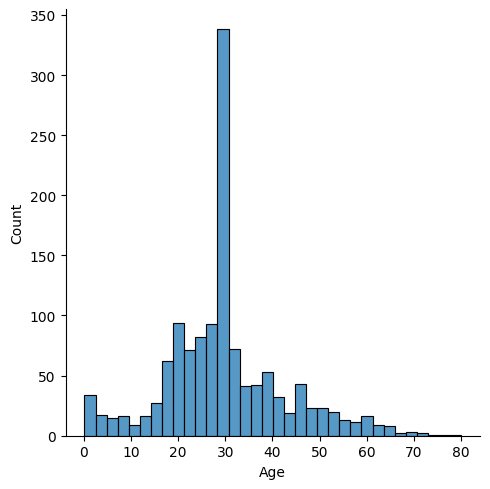

In [22]:
sns.displot(complete_df, x = 'Age')
# seems like most of them are healthy young adult between 20 to 40

<Axes: xlabel='Sex', ylabel='count'>

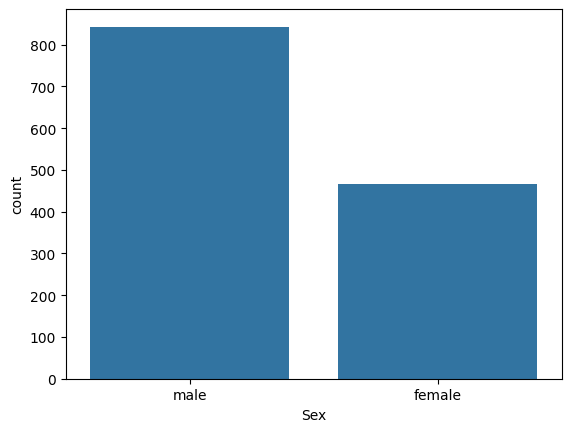

In [23]:
sns.countplot(complete_df, x = 'Sex')
# more men than female

<Axes: xlabel='count', ylabel='Pclass'>

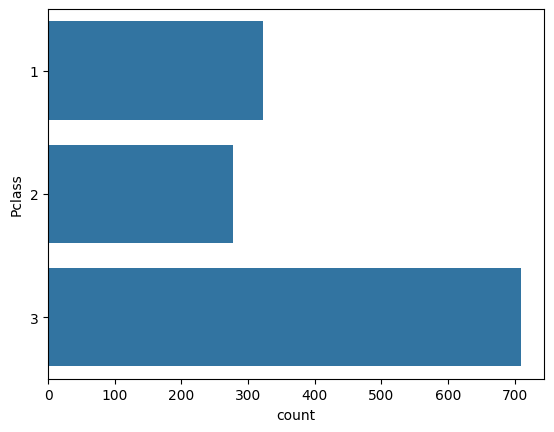

In [24]:
sns.countplot(complete_df, y = "Pclass")
# most of them are in 3rd class

<Axes: xlabel='Pclass', ylabel='count'>

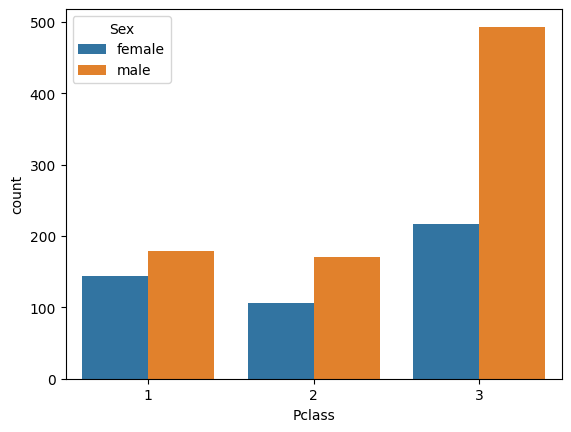

In [25]:
sns.countplot(complete_df, x = 'Pclass', hue = 'Sex')

# Encoding

In [26]:
complete_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [27]:
complete_df['Sex'].value_counts(), complete_df['Embarked'].value_counts()

(Sex
 male      843
 female    466
 Name: count, dtype: int64,
 Embarked
 S    916
 C    270
 Q    123
 Name: count, dtype: int64)

In [28]:
complete_df['Sex'] = complete_df['Sex'].map({'male': 0, 'female': 1})
complete_df['Embarked'] = complete_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Model

In [110]:
model = LogisticRegression(max_iter=103  )

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(complete_df, complete_Y_df, test_size = 0.2, random_state = 2)

In [107]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1047, 7), (1047,), (262, 7), (262,))

In [111]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=103)

In [112]:
train_prediction = model.predict(X_train)

In [113]:
train_accuracy = accuracy_score(train_prediction, Y_train)
print(train_accuracy)

0.8595988538681948


In [114]:
test_prediction = model.predict(X_test)

In [115]:
test_accuracy = accuracy_score(test_prediction, Y_test)
print(test_accuracy)

0.8587786259541985
